<a href="https://colab.research.google.com/github/alik604/Notebooks/blob/master/google-Colab/ETF_tsa_seasonal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## exploration of seasonality in the SPX, airline stocks, and slected comadition based 3x leverage ETFs 


In [0]:
#sdasdasd
# Importing the libraries
import scipy
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional , CuDNNLSTM
import math
from sklearn.metrics import mean_squared_error
!pip install pandas-datareader
from pandas_datareader import data as pdr
!pip install fix-yahoo-finance
import fix_yahoo_finance as yf


Using TensorFlow backend.


In [0]:
share = 'DGAZ'
yf
#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"2013-1-1") #, start="2017-01-01"

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head()

[*********************100%***********************]  1 of 1 downloaded


,Close
Date,
2013-01-02,2280.0
2013-01-03,2388.0
2013-01-04,2197.0
2013-01-07,2213.0
2013-01-08,2282.0


In [0]:
#dataset['MA'] = dataset.rolling(window=5).mean()



In [0]:
from statsmodels.tsa.seasonal import seasonal_decompose


# https://www.cbcity.de/timeseries-decomposition-in-python-with-statsmodels-and-pandas

# https://gist.github.com/balzer82/5cec6ad7adc1b550e7ee

import statsmodels.api as sm

The `seasonal_decompose()` function needs a parameter called `freq`, which could be computed from the Pandas Timeseries, but is not fully functional right now. So we have to specify it for ourselves. The frequency of decomposition must be an interval, which ‘may’ repeat. Like a hour, a week, a day or something one is interested in.  Our data is stored with 15min resolution and I want to see a weekly seasonality, so our `freq` is

decompfreq=24h⋅60min15min⋅7days
The Python implementation is this:


decompfreq = 24*60/15*7
Now we can decompose the Pandas TimeSeries with statsmodels:


res = sm.tsa.seasonal_decompose(centrumGalerie.Belegung.interpolate(),
 freq=decompfreq,
 model='additive')
resplot = res.plot()

The resulting decomposed timeseries is looking like this:

note: seasonal tiome series IFF low residuals

When you compare this predicted value with the observed one whatever difference you get is called Residual


for time series involving quantities (money), uses multiplicative, not additive



array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff993794908>,
      dtype=object)

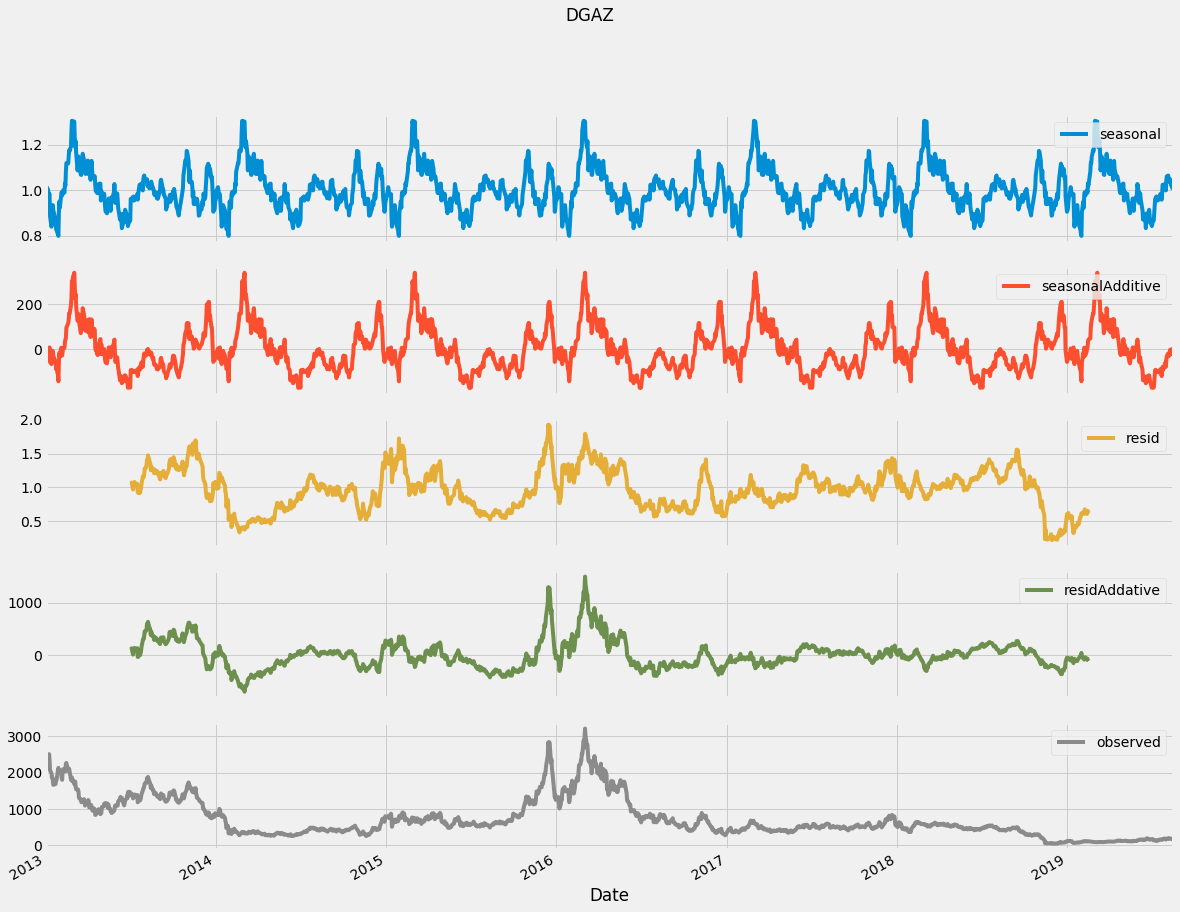

In [0]:
result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)
resulta = seasonal_decompose(dataset.Close, model='additive',freq=252)
# print()
# print()
# print(result.resid)
# print(result.observed)

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
     "seasonalAdditive":resulta.seasonal,
    "resid":result.resid
      , "residAddative":resulta.resid
    ,"observed":result.observed
    
    
})


df.plot(title= "DGAZ", figsize=(18,15),subplots=(5,1))


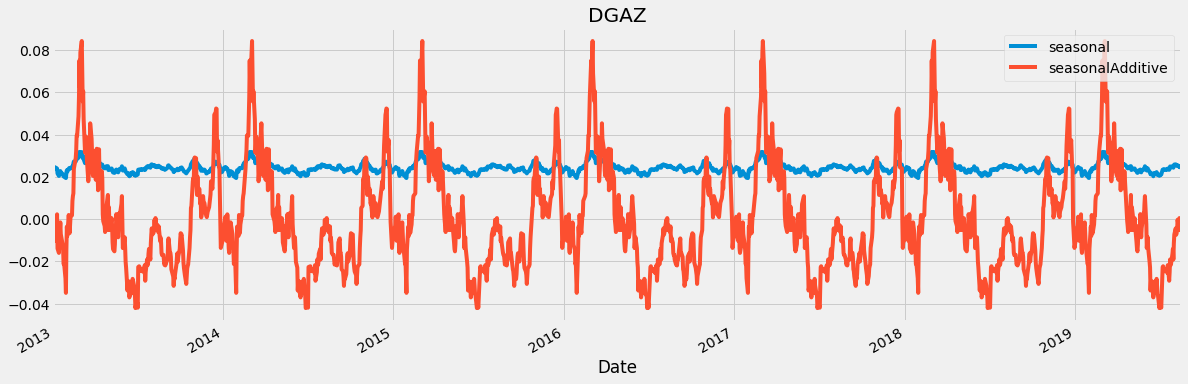

In [0]:
result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)
resulta = seasonal_decompose(dataset.Close, model='additive',freq=252)
# print()
# print()
# print(result.resid)
# print(result.observed)


resultSeasonal = result.seasonal/ np.linalg.norm(result.seasonal)
resultAddSeasonal = resulta.seasonal / np.linalg.norm(resulta.seasonal)

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":resultSeasonal,
     "seasonalAdditive":resultAddSeasonal,
  #  "resid":result.resid
 #     , "residAddative":resulta.resid
#    ,"observed":result.observed
    
    
})


df.plot(title= "DGAZ", figsize=(18,6))

In [0]:
n =252
dataset = yf.download(share,"2017-1-1") #, start="2017-01-01"

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 



result = seasonal_decompose(dataset, model='multiplicative',freq=252)



df = pd.DataFrame({
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df.plot(title="USLV (inverse silver )",figsize=(18,15),subplots=(4,1))


[*********************100%***********************]  1 of 1 downloaded


ValueError: ignored

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff99337a5c0>,
      dtype=object)

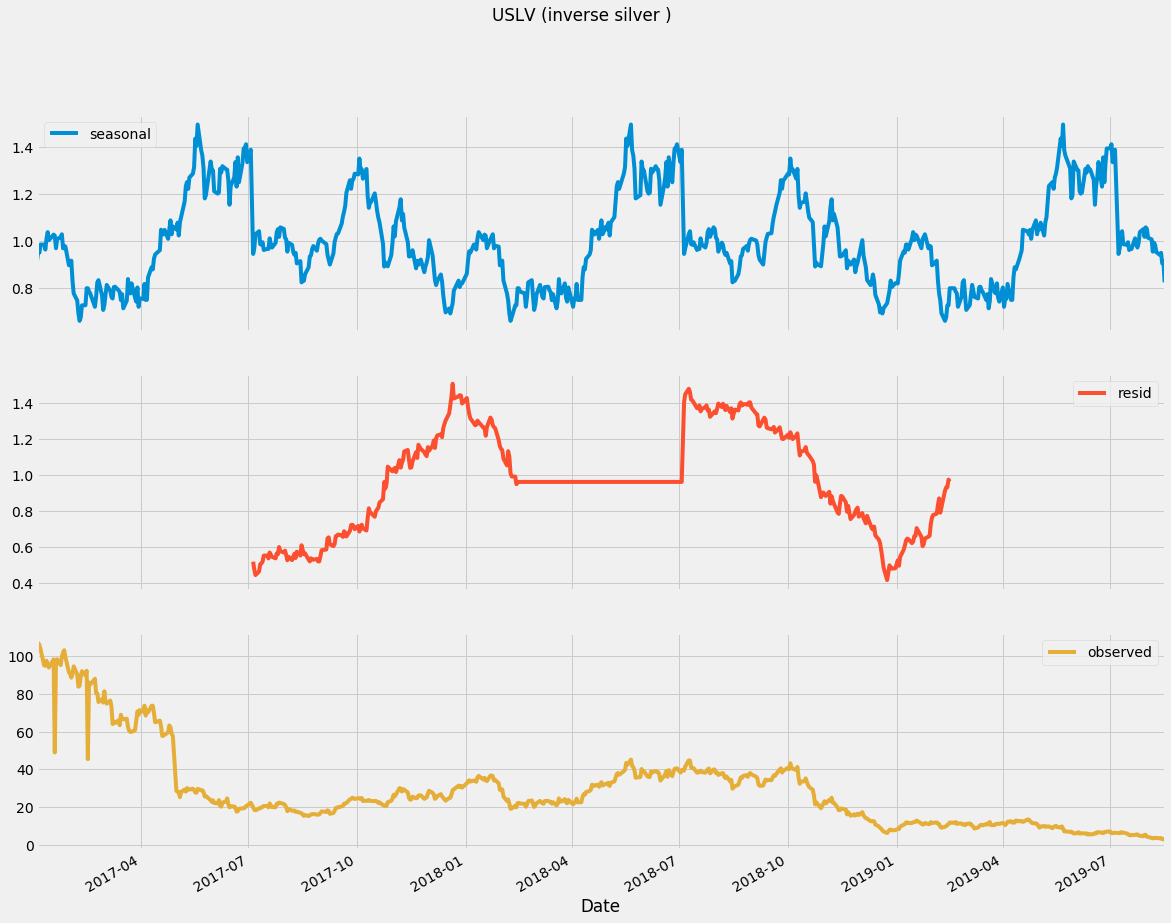

In [0]:
share = 'gush'

#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"2017-1-1") #, start="2017-01-01"

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 

result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df.plot(title="USLV (inverse silver )",figsize=(18,15),subplots=(4,1))

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff99314b5f8>,
      dtype=object)

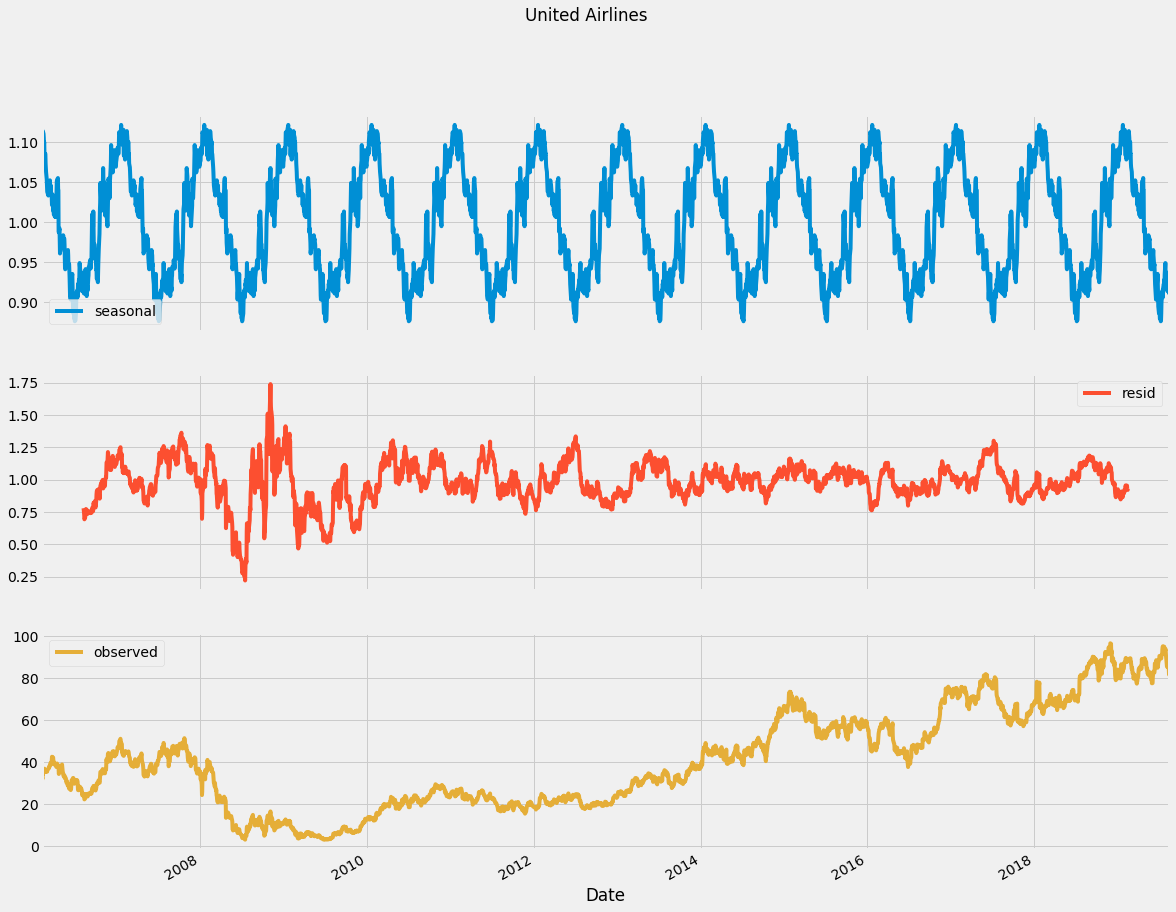

In [0]:
share = 'UAL'

#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"1995-1-1") #, start="2017-01-01"


#dataset= dataset['2013-01-01':] #stripper 

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 

result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})

df.plot(title="United Airlines",figsize=(18,15),subplots=(4,1))

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9933800b8>,
      dtype=object)

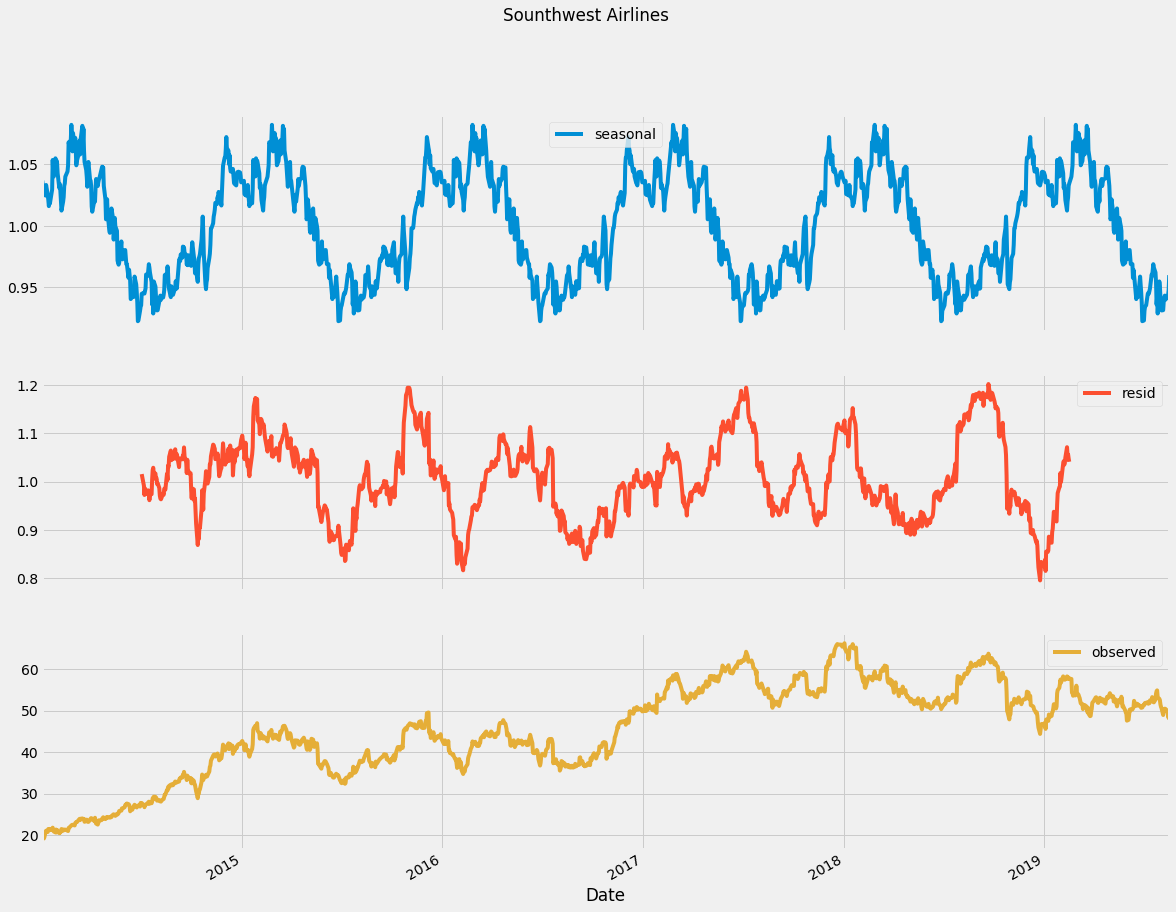

In [0]:


share = 'LUV'

#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"2014-1-1") #, start="2017-01-01"


#dataset= dataset['2013-01-01':] #stripper 

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 


result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)#990

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df.plot(title="Sounthwest Airlines",figsize=(18,15),subplots=(4,1))

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff992e895f8>,
      dtype=object)

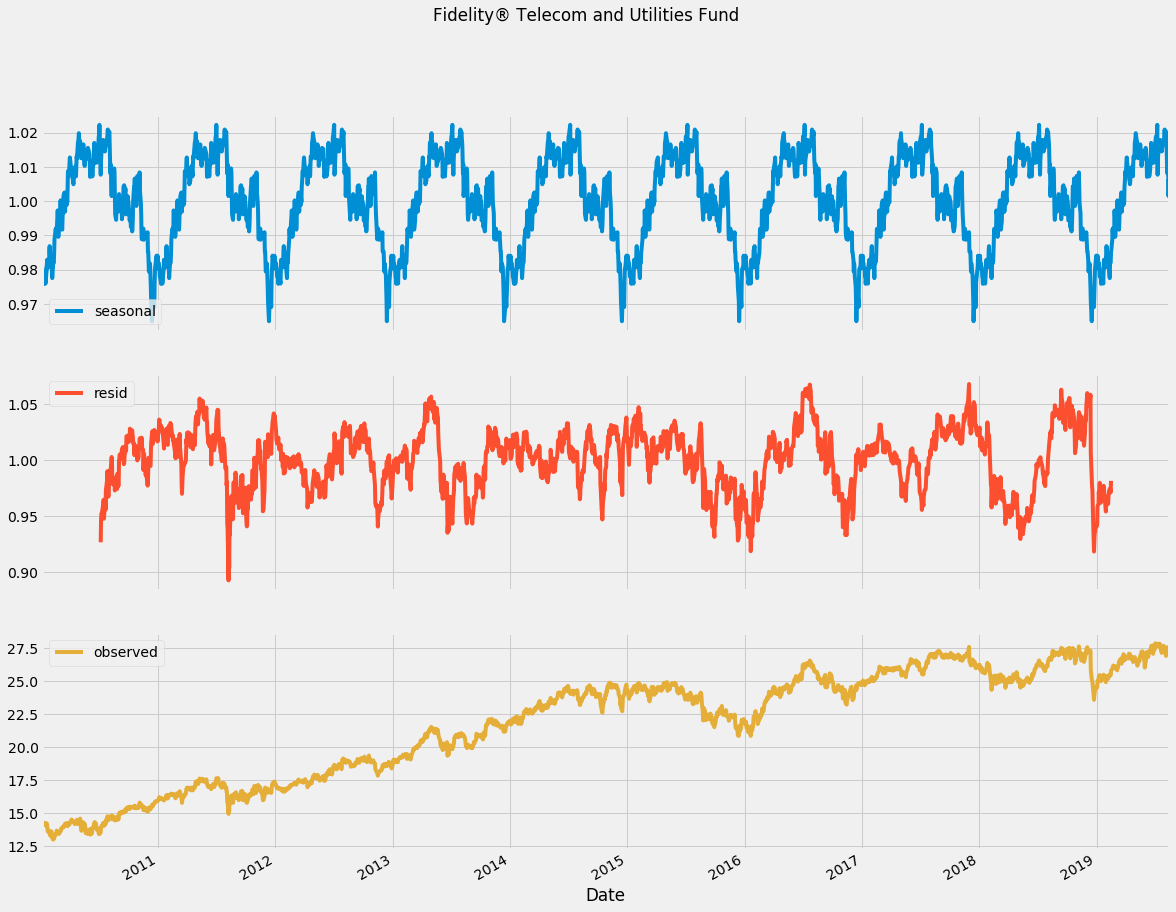

In [0]:
share = 'FIUIX'

#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"2010-1-1") #, start="2017-01-01"


#dataset= dataset['2013-01-01':] #stripper 

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 


result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)#990

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df.plot(title="Fidelity® Telecom and Utilities Fund",figsize=(18,15),subplots=(4,1))

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff992ce4748>,
      dtype=object)

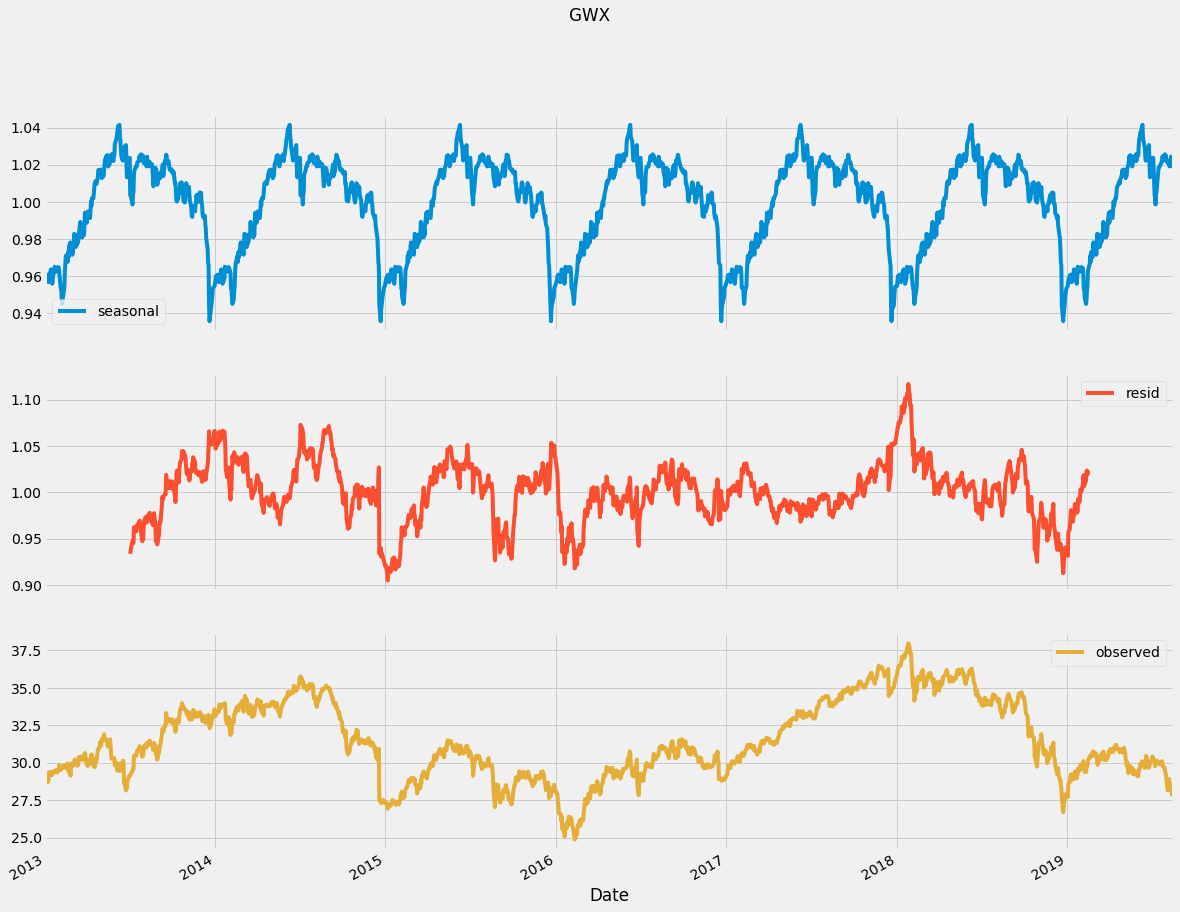

In [0]:
share = 'GWX'

#dataset = yf.download(share,"2003-3-14") #, start="2017-01-01"
dataset = yf.download(share,"2013-1-1") #, start="2017-01-01"


#dataset= dataset['2013-01-01':] #stripper 

dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])
dataset.head(20)

dataset.dropna() # needed for FNGU and FNGD 


result = seasonal_decompose(dataset.Close, model='multiplicative',freq=252)#990

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df.plot(title=share,figsize=(18,15),subplots=(4,1))

[*********************100%***********************]  1 of 1 downloaded


array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff9924e10f0>,
      dtype=object)

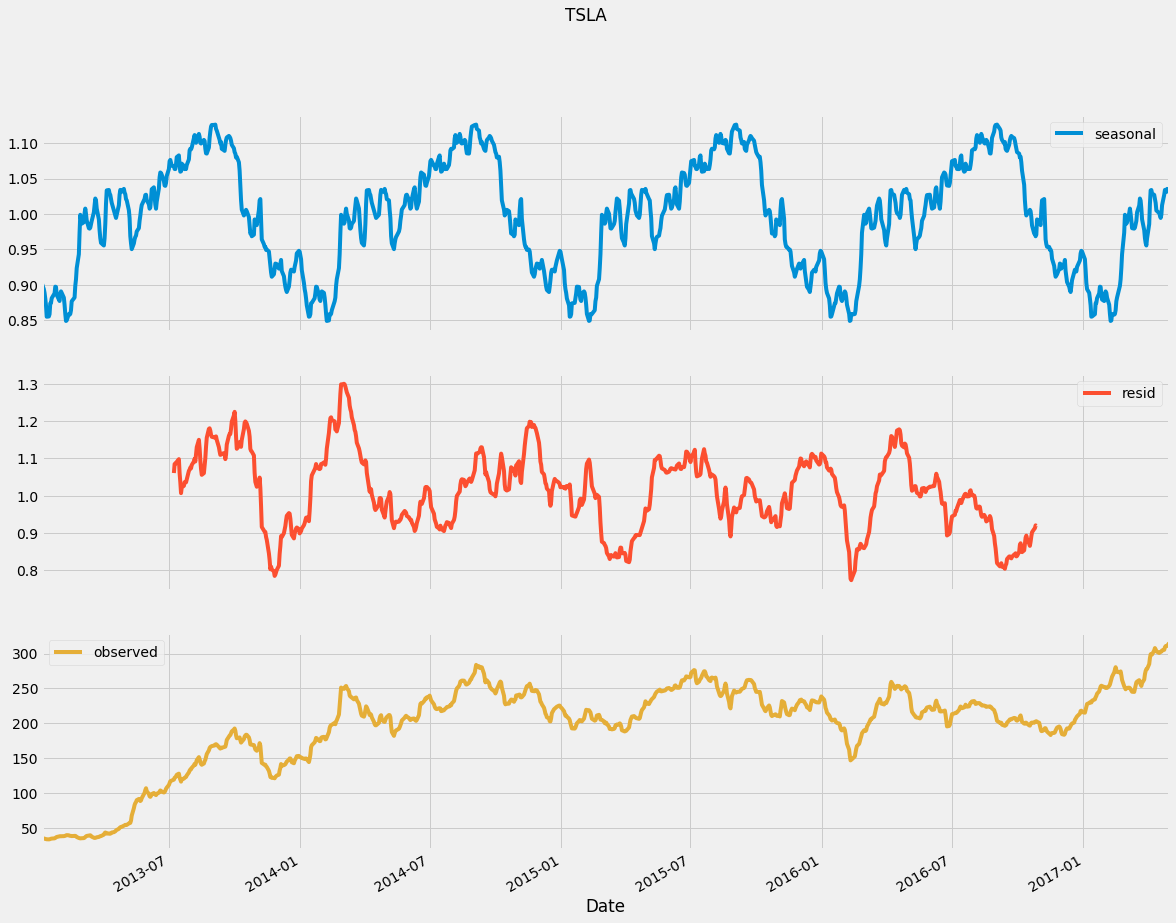

In [0]:
share = 'TSLA'

dataset = yf.download(share,"2003-1-1") #, start="2017-01-01"


dataset= dataset['2013-01-01':'2017-05-01'] #stripper 
dataset = dataset.drop(columns=['Open','High', 'Low','Adj Close','Volume'])

df = pd.DataFrame({"TSLA_three":np.round(dataset.Close.rolling(window = 3, center = False).mean(), 5)}).dropna()


result = seasonal_decompose(df.TSLA_three, model='multiplicative',freq=252)#990

# print()
# print()
# print(result.resid)
# print(result.observed)

# dataset.plot(figsize=(18,6))

df2 = pd.DataFrame({
   # "trend":result.trend,
    "seasonal":result.seasonal,
    "resid":result.resid
    ,"observed":result.observed
    
    
})
df2.plot(title=share,figsize=(18,15),subplots=(4,1))

In [0]:
df2=df2.dropna()
#normalized_df=(df-df.min())/(df.max()-df.min())
df2.corr()

,trend,seasonal,resid,observed
trend,1.000000,-1.386684e-01,-2.717640e-01,0.727704
seasonal,-0.138668,1.000000e+00,2.130640e-16,0.291320
resid,-0.271764,2.130640e-16,1.000000e+00,0.312651
observed,0.727704,2.913199e-01,3.126512e-01,1.000000


a moderate positive relationship is defined as Pearson r = 0.476

https://en.wikipedia.org/wiki/Pearson_correlation_coefficient#For_a_population

http://www.opentextbooks.org.hk/ditatopic/9498

In [0]:
corr,pVal = scipy.stats.pearsonr(df2.seasonal,df2.observed)

print("corr is: ",corr)
if (pVal <  0.05):
   print("P-value is significant! There is a correlation")
   print("Given our significance level of α = 0.05, There is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from 0.")

corr is:  0.2913199008469432
P-value is significant! There is a correlation
Given our significance level of α = 0.05, There is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from 0.


In [0]:
corr,pVal = scipy.stats.spearmanr(df2.seasonal,df2.observed)
print("corr is: ",corr)
if (pVal <  0.05):
   print("P-value is significant! There is a correlation")
   print("Given our significance level of α = 0.05, There is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from 0.")

corr is:  0.3211904935510088
P-value is significant! There is a correlation
Given our significance level of α = 0.05, There is sufficient evidence to conclude that there is a significant linear relationship between x and y because the correlation coefficient is significantly different from 0.


the above is technically worng

because https://stats.stackexchange.com/a/133171/215964

> Pearson correlation is used to look at correlation between series ... but being time series the correlation is looked at across different lags -- the cross-correlation function.

now we use [Cross-correlation](https://en.wikipedia.org/wiki/Cross-correlation#Time_series_analysis)

https://datafireball.com/2018/12/19/cross-correlation-python-basics/

https://www.svds.com/avoiding-common-mistakes-with-time-series/

https://www.fil.ion.ucl.ac.uk/~wpenny/course/array.pdf

# Auto Correlation

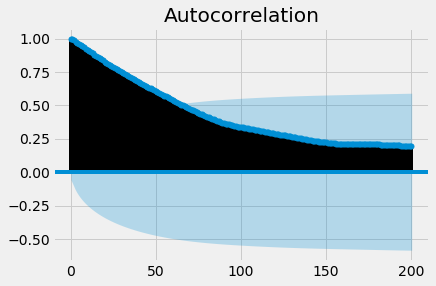

In [0]:
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df.TSLA_three, lags=200)
plt.show()


# 1D Cross Correlation

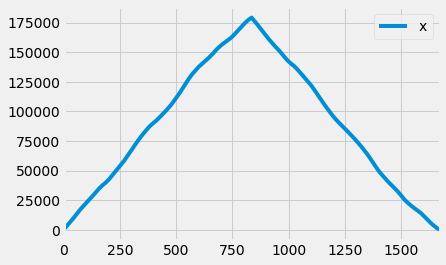

In [0]:
x =scipy.signal.correlate(df2.seasonal,df2.observed) # https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.correlate.html

x=pd.DataFrame({'x':x})
x.plot()
